In [ ]:
# !pip install moviepy
# !pip install librosa
# !pip install spleeter

In [ ]:
from IPython.display import Video, Audio
from moviepy.editor import VideoFileClip
from pathlib import Path
import subprocess
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
video_path = Path('../datasets/music/song_collection_video.mp4')
display(Video(video_path, width=600, height=200) )

In [ ]:
# .wav file is 8 times higher that .mp4
# .aac lossy compression
# .wav losseless compression

In [ ]:
def convert_video_to_audio(video_path, output_audio_path):
    cmd = ['ffmpeg', '-i', video_path, '-vn', '-acodec', 'aac', output_audio_path]
    subprocess.run(cmd)

def convert_aac_to_wav(aac_path, wav_path):
    cmd = ['ffmpeg', '-i', aac_path, wav_path]
    subprocess.run(cmd)

In [ ]:
audio_path = Path('../datasets/music/song_collection_video.aac')
wav_audio_path = Path('../datasets/music/song_collection_video.wav')
if not audio_path.exists():
    convert_video_to_audio(video_path, audio_path)

In [ ]:
if not wav_audio_path.exists():
    convert_aac_to_wav(audio_path, wav_audio_path) 


  * sr is sample rate which means how many samples to select per sec. here default is 22050hz, it will select 22050 sample points.
  
  * y is all the samples.
  
  * y/sr = total duration in seconds.
  
  * each sample point is amplitude at that point of time.
  
  * the reason for the around 20khz sample rate due to the fact that human can hear only upto that range.           accoridng to the "nyquist theorem" you only need 2 times the of sample rate frequency of the maximum    frequency you want to capture. so around 22khz will capture upto around 11kz frequency range that's ok for this use cases. if we want to capture fully human range frequencies (around 20kz) we need sample rate frequency of around 44khz.
  
  * if stored audio file low sample rate then increasing sample rate won't increase the quality of the audio but just useful some starndardization proccess.
 

In [ ]:
y, sr = librosa.load(wav_audio_path, offset=0, duration=60, sr=22050) 

In [ ]:
y.shape,sr,y.min(),y.max()

((2646,), 44.1, -0.032677475, 0.06327734)

In [ ]:
ipd.display(ipd.Audio(data=y, rate=sr))

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)

In [ ]:
mel_spectrogram.shape

(256, 2584)

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
log_mel_spectrogram.shape

(256, 2584)

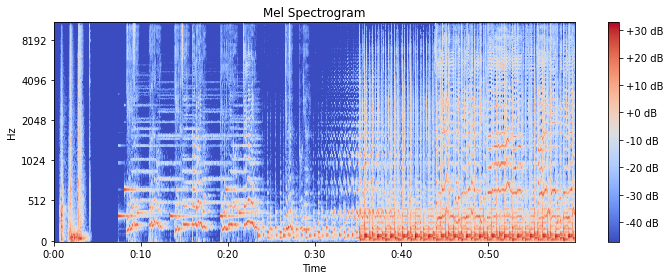

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
mel_spectrogram = librosa.db_to_power(log_mel_spectrogram)
mel_spectrogram.shape

(256, 2584)

In [ ]:
stft = librosa.feature.inverse.mel_to_stft(mel_spectrogram)

In [ ]:
stft.shape

(1025, 2584)

In [ ]:
y_reconstructed = librosa.griffinlim(stft)

In [ ]:
y_reconstructed.shape

(1322496,)

In [ ]:
ipd.display(ipd.Audio(data=y_reconstructed, rate=sr))

#### background separate process (requires more memory to processs)

In [ ]:
# from spleeter.separator import Separator

In [ ]:
# separator = Separator('spleeter:2stems')

In [ ]:
# separator.separate_to_file('./datasets/music/song_collection_video.wav', './datasets/music/background')

In [ ]:
# ipd.display(ipd.Audio('./datasets/music/background/song_collection_video/accompaniment.wav'))

In [ ]:
# y, sr = librosa.load(wav_audio_path, offset=0, duration=60) 